# K-MEANS

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
x,_=make_blobs(n_samples=500, centers=5, random_state=20)
print(x.shape)

(500, 2)


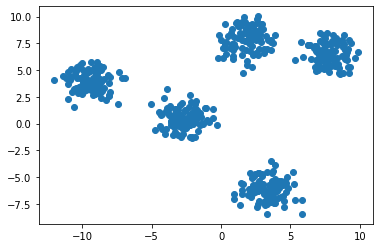

In [5]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [6]:
k=5
colors=['red','green','blue','pink','orange']

#Dictionary
clusters={}


#init CLuster Centers
for i in range(k):
    center = 10*(2*np.random.random((2,))-1)
    cluster = {
        'center':center,
        'points':[],
        'color':colors[i]
    }
    clusters[i]=cluster
print(clusters)

{0: {'center': array([5.58294499, 2.45947942]), 'points': [], 'color': 'red'}, 1: {'center': array([8.98031065, 7.43846199]), 'points': [], 'color': 'green'}, 2: {'center': array([ 9.80145484, -3.09976683]), 'points': [], 'color': 'blue'}, 3: {'center': array([-1.68233132,  2.58308174]), 'points': [], 'color': 'pink'}, 4: {'center': array([-6.09845942,  9.28975391]), 'points': [], 'color': 'orange'}}


In [7]:
clusters[0]

{'center': array([5.58294499, 2.45947942]), 'points': [], 'color': 'red'}

In [8]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [9]:
# 1. STEP - Assign each point to one of the Cluster based upon distance
def assignpointtoCLuster(clusters):
    m=x.shape[0]
    for i in range(m):
        current_x = x[i]
        dist=[]
        #For Every Cluster 
        for j in range(k):
            cc=clusters[j]['center']
            d=distance(current_x,cc)
            dist.append(d)
        nearest= np.argmin(dist)
        clusters[nearest]['points'].append(current_x)

In [10]:
def updateclusterCenters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            u = pts.mean(axis=0)
            clusters[i]['center'] = u
            clusters[i]['points'] = []

In [11]:
def plotClusters(clusters):
    for i in range(k):
        # GET all the points assigned
        pts = np.array(clusters[i]['points'])
        ui = clusters[i]['center']
        if pts.shape[0]>0:
            clr = clusters[i]['color']
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        plt.scatter(ui[0],ui[1],color='black', marker='*')

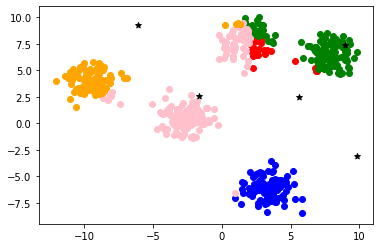

In [12]:
assignpointtoCLuster(clusters)
plotClusters(clusters)
updateclusterCenters(clusters)